In [1]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [6]:
NB.fit(X_train, y_train)

predicted= NB.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score (y_test, predicted))

0.9736842105263158


In [8]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print (report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [9]:
from sklearn.metrics import confusion_matrix
conf= confusion_matrix(y_test,predicted)
print (conf)

[[40  3]
 [ 0 71]]


In [10]:
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='entropy') 
DT.fit(X_train, y_train)
predicted= DT.predict(X_test)
print(accuracy_score (y_test, predicted))

0.9473684210526315


In [11]:
report = classification_report(y_test, predicted)
print (report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [12]:
conf= confusion_matrix(y_test,predicted)
print (conf)

[[38  5]
 [ 1 70]]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
predicted =  KNN.predict(X_test)

print (accuracy_score(y_test, predicted))

0.9298245614035088


In [15]:
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

   micro avg       0.93      0.93      0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [16]:
conf = confusion_matrix(y_test, predicted)
print(conf)

[[38  5]
 [ 3 68]]


In [17]:
import numpy as np
accscr = np.empty((25))
kvalues = np.empty((25))
for K in range(25):
    K_value = K + 1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights = 'uniform')
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    accscr[K] = accuracy_score(y_test, predicted) *100
    kvalues[K] = K+1
    print ("Accuracy is ", accscr[K], "for K-value: ", K_value)

Accuracy is  92.98245614035088 for K-value:  1
Accuracy is  92.98245614035088 for K-value:  2
Accuracy is  92.98245614035088 for K-value:  3
Accuracy is  93.85964912280701 for K-value:  4
Accuracy is  95.6140350877193 for K-value:  5
Accuracy is  96.49122807017544 for K-value:  6
Accuracy is  95.6140350877193 for K-value:  7
Accuracy is  95.6140350877193 for K-value:  8
Accuracy is  95.6140350877193 for K-value:  9
Accuracy is  97.36842105263158 for K-value:  10
Accuracy is  98.24561403508771 for K-value:  11
Accuracy is  98.24561403508771 for K-value:  12
Accuracy is  97.36842105263158 for K-value:  13
Accuracy is  97.36842105263158 for K-value:  14
Accuracy is  96.49122807017544 for K-value:  15
Accuracy is  96.49122807017544 for K-value:  16
Accuracy is  96.49122807017544 for K-value:  17
Accuracy is  96.49122807017544 for K-value:  18
Accuracy is  96.49122807017544 for K-value:  19
Accuracy is  96.49122807017544 for K-value:  20
Accuracy is  96.49122807017544 for K-value:  21
Accur

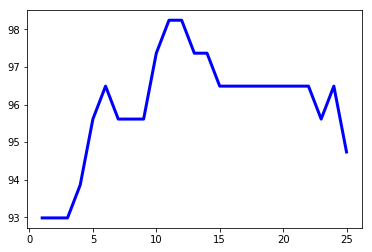

In [19]:
import matplotlib.pyplot as plt
plt.plot(kvalues, accscr, color = 'blue', linewidth=3)
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(cv_score)
print(cv_score.mean())

[0.86086957 0.92173913 0.92920354 0.94690265 0.94690265]
0.9211235090419392


In [30]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(DT, X, y, cv=2, scoring='precision')
print(cv_score)
print(cv_score.mean())

[0.92021277 0.96363636]
0.9419245647969052


In [32]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(NB, X, y, cv=2, scoring='recall')
print(cv_score)
print(cv_score.mean())

[0.96648045 0.96629213]
0.9663862908794175
